# Author: Стурейко Игорь
## Project: Geekbrains.Algorithms
## Lesson 05 - Градиентный бустинг
## Date: 2020-09-09

In [62]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
from matplotlib import pyplot as plt

In [3]:
class GradBoost:

    def __init__(self, n_trees=10, max_depth=5, eta=0.1):
        self.eta = eta
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = [1] * self.n_trees
        self.trees = None
        self.train_errors = None
        self.test_errors = None

    def fit(self, X_train, X_test, y_train, y_test):

        # Деревья будем записывать в список
        self.trees = []

        # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль,
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)

                self.train_errors.append(self.mean_squared_error(y_train, self.predict(X_train)))
                self.test_errors.append(self.mean_squared_error(y_test, self.predict(X_test)))
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, self.bias(y_train, target))

                self.train_errors.append(self.mean_squared_error(y_train, self.predict(X_train)))
                self.test_errors.append(self.mean_squared_error(y_test, self.predict(X_test)))

            self.trees.append(tree)

        if self.trees and self.train_errors and self.test_errors:
            return 0
        else:
            return -1

    @staticmethod
    def mean_squared_error(y_real, prediction):
        return (sum((y_real - prediction) ** 2)) / len(y_real)

    @staticmethod
    def bias(y, z):
        return y - z

    def predict(self, X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
        # прибавляются с шагом eta
        return np.array(
            [sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])


In [8]:
def mean_squared_error(y_real, prediction):
        return (sum((y_real - prediction) ** 2)) / len(y_real)

In [6]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [ ]:
def evaluate_alg(X_train, X_test, y_train, y_test, n_trees, max_depth, eta):
    gd_boost = GradBoost(n_trees=n_trees, max_depth=max_depth, eta=eta)
    gd_boost.fit(X_train, X_test, y_train, y_test)
    train_prediction = gd_boost.predict(X_train)
    test_prediction = gd_boost.predict(X_test)
    train_error = mean_squared_error(y_train, train_prediction)
    test_error = mean_squared_error(y_test, test_prediction)

    print(f'\nОшибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
с шагом {eta}\nна тренировочной выборке:\t{train_error}\n\
на тестовой выборке:\t\t{test_error}')
    return train_error, test_error

In [55]:
evaluate_alg(X_train, X_test, y_train, y_test, n_trees=10, max_depth=5, eta=0.1)

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1
на тренировочной выборке:	4808.765338313985
на тестовой выборке:		6510.765801431719


(4808.765338313985, 6510.765801431719)

## Задание 1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [72]:
trees_max = 30
train_error = np.zeros(trees_max)
test_error = np.zeros(trees_max)
num_of_trees = np.linspace(1, trees_max, trees_max, dtype=int)
for i in num_of_trees:
    s1, s2 = evaluate_alg(X_train, X_test, y_train, y_test, n_trees=i, max_depth=3, eta=0.1)
    train_error[i-1] = s1
    test_error[i-1] = s2

Ошибка алгоритма из 1 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	24039.895528906738
на тестовой выборке:		24413.129701802198
Ошибка алгоритма из 2 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	20015.47851604497
на тестовой выборке:		20509.297006888217
Ошибка алгоритма из 3 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	16727.861969434092
на тестовой выборке:		17367.048420743762
Ошибка алгоритма из 4 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	14068.729146787773
на тестовой выборке:		14765.235477734626
Ошибка алгоритма из 5 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	11880.348070966038
на тестовой выборке:		12681.547464178186
Ошибка алгоритма из 6 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	10120.01876734303
на тестовой выборке:		10948.78544992662
Ошибка алгоритма из 7 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	8655.000710170483
на тестовой выборке:		9581.310691455006
Ошибка алгоритма из 8 дер

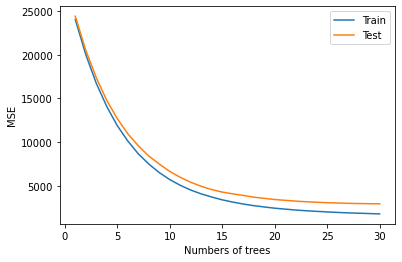

In [73]:
plt.plot(num_of_trees, train_error, label='Train')
plt.plot(num_of_trees, test_error, label="Test")
plt.legend()
plt.xlabel('Numbers of trees')
plt.ylabel('MSE')
plt.show()

In [74]:
max_depth = 10
train_error = np.zeros(max_depth)
test_error = np.zeros(max_depth)
tree_depths = np.linspace(1, max_depth, max_depth, dtype=int)
for i in tree_depths:
    s1, s2 = evaluate_alg(X_train, X_test, y_train, y_test, n_trees=15, max_depth=i, eta=0.1)
    train_error[i-1] = s1
    test_error[i-1] = s2

Ошибка алгоритма из 15 деревьев глубиной 1 с шагом 0.1
на тренировочной выборке:	4651.288413128997
на тестовой выборке:		4537.44005647898
Ошибка алгоритма из 15 деревьев глубиной 2 с шагом 0.1
на тренировочной выборке:	3954.9708210055287
на тестовой выборке:		4323.315073391774
Ошибка алгоритма из 15 деревьев глубиной 3 с шагом 0.1
на тренировочной выборке:	3378.7776393859585
на тестовой выборке:		4268.70290304035
Ошибка алгоритма из 15 деревьев глубиной 4 с шагом 0.1
на тренировочной выборке:	2848.229333120017
на тестовой выборке:		4046.129151289355
Ошибка алгоритма из 15 деревьев глубиной 5 с шагом 0.1
на тренировочной выборке:	2398.611961876839
на тестовой выборке:		4440.808894807821
Ошибка алгоритма из 15 деревьев глубиной 6 с шагом 0.1
на тренировочной выборке:	1890.6566188187185
на тестовой выборке:		4518.80412960331
Ошибка алгоритма из 15 деревьев глубиной 7 с шагом 0.1
на тренировочной выборке:	1655.4683115050443
на тестовой выборке:		4663.164168981887
Ошибка алгоритма из 15 дер

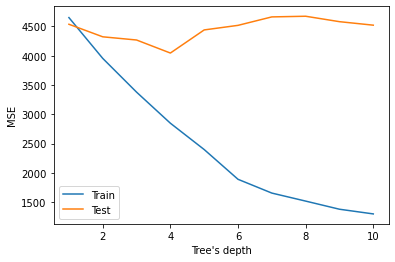

In [75]:
plt.plot(tree_depths, train_error, label='Train')
plt.plot(tree_depths, test_error, label="Test")
plt.legend()
plt.xlabel('Tree\'s depth')
plt.ylabel('MSE')
plt.show()

### Для данной выборки оптимальным является глубина дерева = 4 и количество деревьев около 20

## Задание 2

## Задание 3. 

In [76]:
class MyGradBoost:

    def __init__(self, n_trees=10, max_depth=5, eta=0.1):
        self.eta = eta
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = [1] * self.n_trees
        self.trees = None
        self.train_errors = None
        self.test_errors = None

    def fit(self, X_train, X_test, y_train, y_test):

        # Деревья будем записывать в список
        self.trees = []

        # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль,
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)

                self.train_errors.append(self.mean_squared_error(y_train, self.predict(X_train)))
                self.test_errors.append(self.mean_squared_error(y_test, self.predict(X_test)))
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, self.bias(y_train, target))

                self.train_errors.append(self.mean_squared_error(y_train, self.predict(X_train)))
                self.test_errors.append(self.mean_squared_error(y_test, self.predict(X_test)))

            self.trees.append(tree)

        if self.trees and self.train_errors and self.test_errors:
            return 0
        else:
            return -1

    @staticmethod
    def mean_squared_error(y_real, prediction):
        return (sum((y_real - prediction) ** 2)) / len(y_real)

    @staticmethod
    def bias(y, z):
        return y - z

    def predict(self, X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
        # прибавляются с шагом eta
        return np.array(
            [sum([self.eta * coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

